In [ ]:
# 데이터 구성:Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
import graphviz

# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 퇴직자

## 데이터 정제

In [ ]:
dfloan_train = pd.read_csv('/home/piai/test/Data3/auto_loan_train.csv', encoding = 'euc-kr')
dfc_train = pd.read_csv('/home/piai/test/Data3/auto_customer_train.csv', encoding = 'euc-kr')
dfloan_test = pd.read_csv('/home/piai/test/Data3/auto_loan_test.csv', encoding = 'euc-kr')
dfc_test = pd.read_csv('/home/piai/test/Data3/auto_customer_test.csv', encoding = 'euc-kr')

In [ ]:
df = pd.merge(dfc_train,dfloan_train, how='right',on='CustomerId')

In [ ]:
df = df.drop(['CustomerId','LoanId','HouseAge'], axis = 1)
df_em = df[(df['IncomeType'] == '퇴직')]
df_em = df_em.drop('EmployedYears', axis=1)

* 퇴직자 데이터셋 구성

In [ ]:
df_em['AgeGroup'] = pd.cut(df_em['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}' for i in range(0, 100, 10)])
df_em['IdChangedYears'] = pd.cut(df_em['IdChangedYears'], bins=range(0, 17, 4), right=False, labels=[f'{i}' for i in range(0, 15, 4)])
df_em['InstallAmount'] = pd.cut(df_em['InstallAmount'], bins=range(0, 5500000, 500000), right=False, labels=[f'{i}' for i in range(0, 5000000, 500000)])

* 연속형 변수 구간별 대표값으로 지정

In [ ]:
# 변수중요도 확인 후 가중치 설정
li_w = [[0.299],[0.2276],[0.09333],[0.07333],[0.01333],[0.24],[0.0106],[0.02466],[0.018]]

* GB 변수중요도에서 확인한 변수의 가중치

## Score 신뢰도 분석

In [ ]:
df_a = df_em.drop(['ScoreC', 'ScoreB'], axis=1)

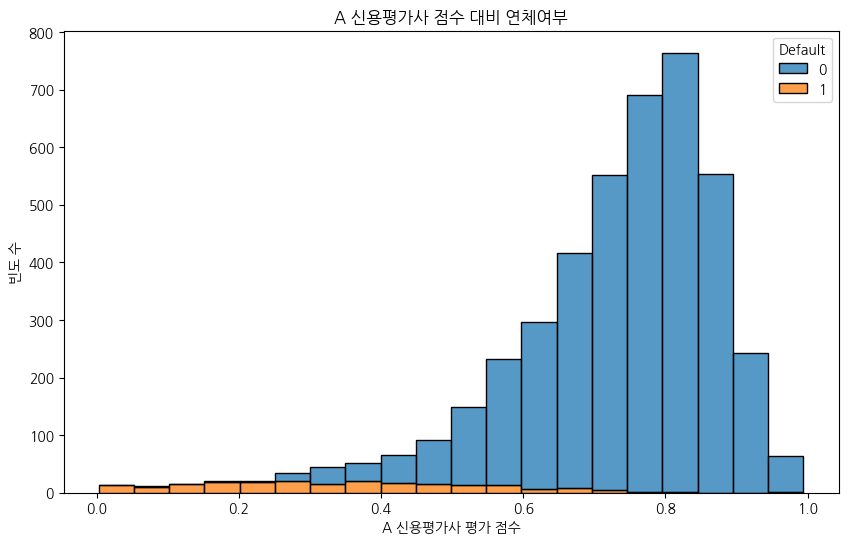

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_a, x='ScoreA', hue='Default', multiple='stack', bins=20)
plt.title('A 신용평가사 점수 대비 연체여부')
plt.xlabel('A 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

In [ ]:
df_b = df_em.drop(['ScoreA', 'ScoreC'], axis=1)
df_b = df_b.dropna()

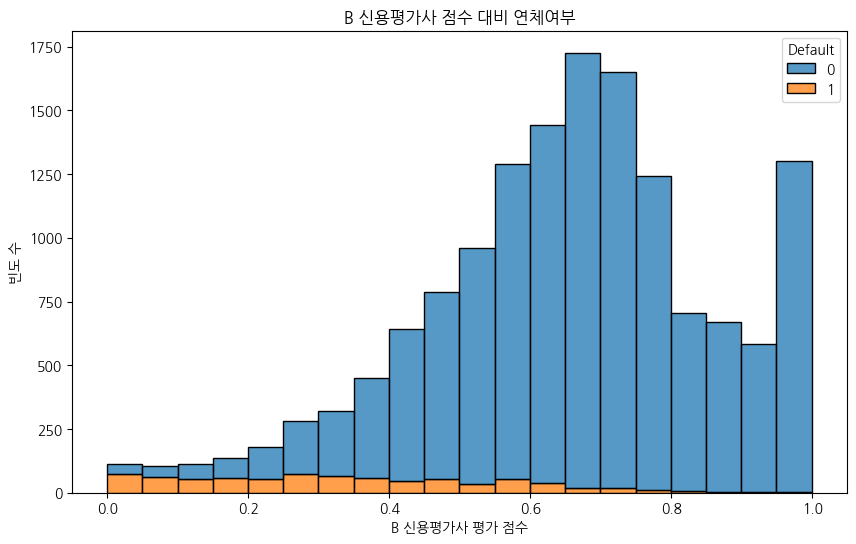

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_b, x='ScoreB', hue='Default', multiple='stack', bins=20)
plt.title('B 신용평가사 점수 대비 연체여부')
plt.xlabel('B 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

In [ ]:
df_c = df_em.drop(['ScoreA', 'ScoreB'], axis=1)
df_c = df_c.dropna()

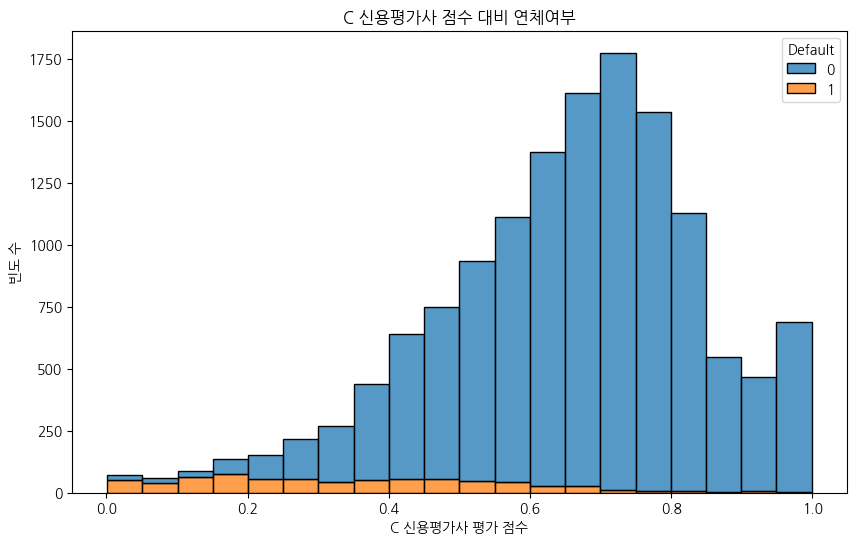

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_c, x='ScoreC', hue='Default', multiple='stack', bins=20)
plt.title('C 신용평가사 점수 대비 연체여부')
plt.xlabel('C 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

* A,B,C 평가사 모두 높은 점수를 준 고객이 연체된 사례 발견

  -> 개선기회 파악

## ScoreABC

In [ ]:
li_w = [[0.299],[0.2276],[0.09333],[0.07333],[0.01333],[0.24],[0.0106],[0.02466],[0.018]]

In [ ]:
df_all = df_em.dropna(subset=['ScoreC','ScoreA', 'ScoreB'])
# df_all = df_all.drop('Default', axis=1)

In [ ]:
df_all.dropna(inplace=True)

/tmp/ipykernel_8345/2735049475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.dropna(inplace=True)


In [ ]:
df_all['Age'] = df_all['Age'].astype('int')

df_all['IdChangedYears'] = df_all['IdChangedYears'].astype('int')
df_all['InfoChangedYears'] = df_all['InfoChangedYears'].astype('int')
df_all['PhoneChangedYears'] = df_all['PhoneChangedYears'].astype('int')
df_all['AgeGroup'] =df_all['AgeGroup'].astype('int')
df_all['InstallAmount'] = df_all['InstallAmount'].astype('int')

/tmp/ipykernel_8345/771331714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Age'] = df_all['Age'].astype('int')
/tmp/ipykernel_8345/771331714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['IdChangedYears'] = df_all['IdChangedYears'].astype('int')
/tmp/ipykernel_8345/771331714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [ ]:
df_all = pd.get_dummies(df_all)

In [ ]:
df_all['Aver'] = df_all[['ScoreA','ScoreB','ScoreC']].mean(axis=1)

In [ ]:
df_all['Aver'].value_counts()

0.775667    9
0.872333    9
0.865667    8
0.763333    8
0.790000    8
           ..
0.468000    1
0.410333    1
0.559000    1
0.481667    1
0.916000    1
Name: Aver, Length: 1622, dtype: int64

## Score_Mirae 생성

In [ ]:
df_all['AgeGroup'] = df_all['AgeGroup'].replace({30: 0.3,20: 0.25,40: 0.2,60: 0.15,50: 0.1})
df_all['PhoneChangedYears'] = df_all['PhoneChangedYears'].replace({1: 0.2, 0: 0.15, 2: 0.13, 4: 0.12, 5: 0.11, 3: 0.09, 6: 0.08, 7: 0.07, 8: 0.05})
df_all['IdChangedYears'] = df_all['IdChangedYears'].replace({4: 0.4, 0: 0.3, 12: 0.2, 8: 0.1})
df_all['InstallAmount'] = df_all['InstallAmount'].replace({
    3500000: 0.2,
    1000000: 0.15,
    0: 0.13,
    500000: 0.12,
    1500000: 0.11,
    4000000: 0.09,
    3000000: 0.08,
    2000000: 0.06,
    1000000: 0.02,
    2500000: 0.02,
    4500000: 0.02
})
df_all['ResidenceClass_최상'] = df_all['ResidenceClass_최상'].replace({1: 0.048})
df_all['Gender_남성'] = df_all['Gender_남성'].replace({1:0.032})
df_all['Education_대학교'] = df_all['Education_대학교'].replace({1:0.054})

* DT모델을 통해 값에 대해 가중치 설정

In [ ]:
df_value_w = df_all[['ResidenceClass_평균','PhoneChangedYears', 'IdChangedYears', 'ResidenceClass_최상', 'InquiryCount', 'AgeGroup', 'Gender_남성','InstallAmount','Education_대학교']]
df_y = df_all['Aver']

In [ ]:
df_value_w = np.array(df_value_w)
df_x_w = np.array(li_w)

In [ ]:
df_mirae = df_value_w.dot(df_x_w)

* 행렬 연산 통한 회귀식 생성(가중치 곱)

In [ ]:
len(df_mirae)

3243

In [ ]:
df_ScoreM = pd.DataFrame(df_mirae)
df_ScoreM.rename(columns={0: 'Score_Mirae'}, inplace=True)

In [ ]:
df_ScoreM.value_counts()

Score_Mirae
0.092104       17
0.089638       16
0.105434       14
0.083018       12
0.097431       11
               ..
0.109747        1
0.109745        1
0.109709        1
0.109634        1
0.499699        1
Length: 2371, dtype: int64

In [ ]:
df_ScoreM['Score_Mirae'] = 1 - df_ScoreM['Score_Mirae']

* 정상데이터 파악 가중치 -> 연체데이터 파악 가중치

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m = ['Score_Mirae']
scaler = MinMaxScaler(feature_range=(0.3, 0.9))
df_ScoreM = scaler.fit_transform(df_ScoreM)
df_ScoreM = pd.DataFrame(df_ScoreM, columns=m)

display("Min-Max Scale 변환 후:", df_ScoreM)

'Min-Max Scale 변환 후:'

,Score_Mirae
0,0.372537
1,0.759970
2,0.726819
3,0.797134
4,0.398640
...,...
3238,0.728582
3239,0.842800
3240,0.842472
3241,0.847860


In [ ]:
# bli = [0,0.5,0.7,0.8,1]
# lali = [0.3,0.6,0.8,0.9]

# df_ScoreM['Score_Mirae'] = pd.cut(df_ScoreM['Score_Mirae'], bins=bli, labels=lali, right=True)

# nan_values = df_ScoreM[df_ScoreM['Score_Mirae'].isna()]

# # 결과 출력
# print(nan_values)

In [ ]:
df_ScoreM['Score_Mirae'].value_counts()

0.841429    17
0.844705    16
0.823722    14
0.853499    12
0.841101    11
            ..
0.869890     1
0.889311     1
0.855844     1
0.851547     1
0.833879     1
Name: Score_Mirae, Length: 2371, dtype: int64

In [ ]:
df_y = pd.DataFrame(list(df_y))

In [ ]:
df_test = pd.concat([df_ScoreM,df_y], axis =1 , ignore_index= True)

In [ ]:
df_test.rename(columns={0: 'Score_Mirae'}, inplace=True)
df_test.rename(columns={1: 'Score_ABC'}, inplace=True)

In [ ]:
df_test = df_test.astype('float')

In [ ]:
df_test['Score_Mirae'].corr(df_test['Score_ABC'])

0.1138753647438258

<Axes: >

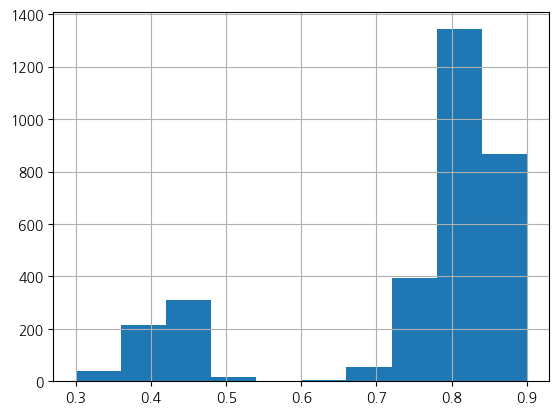

In [ ]:
df_test['Score_Mirae'].hist()

Text(0, 0.5, '빈도')

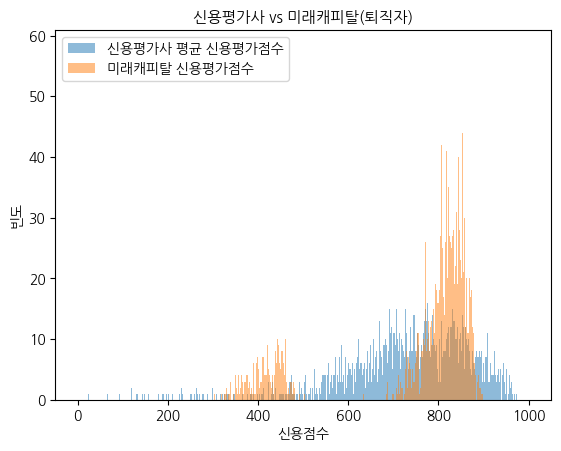

In [ ]:
# plt.subplot(1,2,2)

plt.hist(df_test['Score_ABC']*1000, label = '신용평가사 평균 신용평가점수', alpha = 0.5, bins=range(0, 1001, 1))
plt.hist(df_test['Score_Mirae'] *1000, label = '미래캐피탈 신용평가점수', alpha = 0.5, bins=range(0, 1001, 1))
plt.legend()
plt.title('신용평가사 vs 미래캐피탈(퇴직자)',fontsize=11)

plt.xlabel('신용점수')
plt.ylabel('빈도')

# 검증

In [ ]:
df_test

,Score_Mirae,Score_ABC
0,0.372537,0.655667
1,0.759970,0.652000
2,0.726819,0.830333
3,0.797134,0.689667
4,0.398640,0.688333
...,...,...
3238,0.728582,0.875000
3239,0.842800,0.808333
3240,0.842472,0.895000
3241,0.847860,0.925000


In [ ]:
df_x = df_test[['Score_Mirae']] # or Score_ABC
df_y = df_all['Default']

In [ ]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2270, 1)
train data Y size : (2270,)
test data X size : (973, 1)
test data Y size : (973,)


In [ ]:
tree_uncust = DecisionTreeClassifier()
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.987
Accuracy on test set: 0.904


In [ ]:
# 평가
y_pred = tree_uncust.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncust.score(df_test_x, df_test_y)))
print("미래캐피탈 신용점수 예측모델 평가: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.904

미래캐피탈 신용점수 예측모델 평가: 
[[879  35]
 [ 58   1]]
              precision    recall  f1-score   support

           0      0.938     0.962     0.950       914
           1      0.028     0.017     0.021        59

    accuracy                          0.904       973
   macro avg      0.483     0.489     0.485       973
weighted avg      0.883     0.904     0.893       973



* Accuracy: 0.904, F1-Score 0.02

# 재직자

## 데이터 정제

In [ ]:
df = pd.merge(dfc_train,dfloan_train, how='right',on='CustomerId')

In [ ]:
df = df.drop(['CustomerId','LoanId','HouseAge'], axis = 1)
df = df[(df['IncomeType'] != '퇴직')]

In [ ]:
df = df[(df['IncomeClass'] != '누락')]
df = df[(df['ResidenceClass'] != '누락')]
df = df[(df['DwellingType'] != '정보누락')]

In [ ]:
df['Accompany'] = np.where(df['Accompany'].isin(['배우자', '친지', '기타', '자녀', '단체']), '동행자 있음', '단독')

In [ ]:
df = df.dropna(subset=['IdChangedYears'])#, inplace=True)
df = df.dropna(subset=['PhoneChangedYears'])#, inplace=True)
df = df.dropna(subset=['EmployedYears'])

In [ ]:
df_all = df

## Score 신뢰도 분석

In [ ]:
df_a = df.drop(['ScoreC', 'ScoreB'], axis=1)

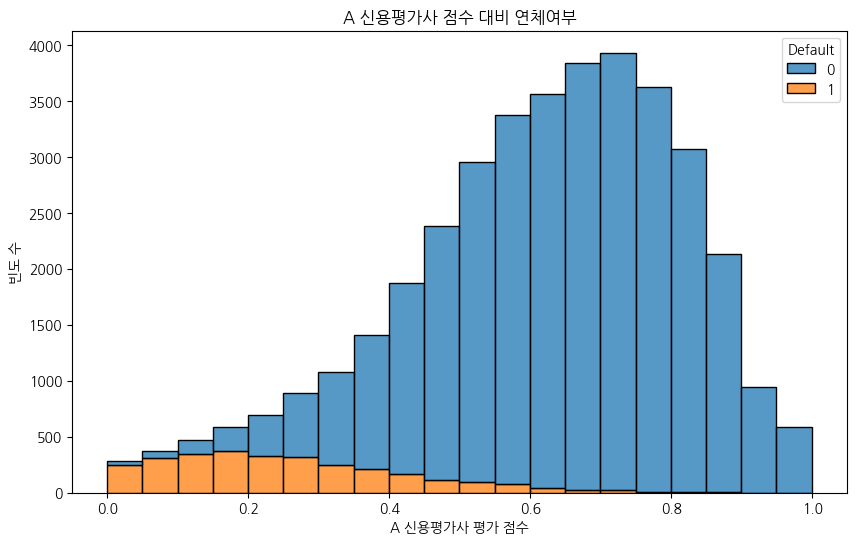

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_a, x='ScoreA', hue='Default', multiple='stack', bins=20)
plt.title('A 신용평가사 점수 대비 연체여부')
plt.xlabel('A 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

In [ ]:
df_b = df.drop(['ScoreA', 'ScoreC'], axis=1)
df_b = df_b.dropna()

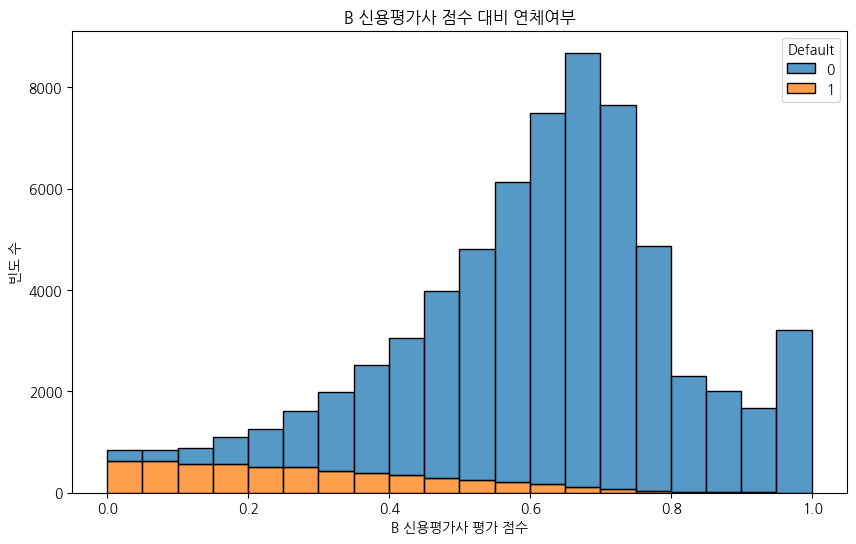

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_b, x='ScoreB', hue='Default', multiple='stack', bins=20)
plt.title('B 신용평가사 점수 대비 연체여부')
plt.xlabel('B 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

In [ ]:
df_c = df.drop(['ScoreA', 'ScoreB'], axis=1)
df_c = df_c.dropna()

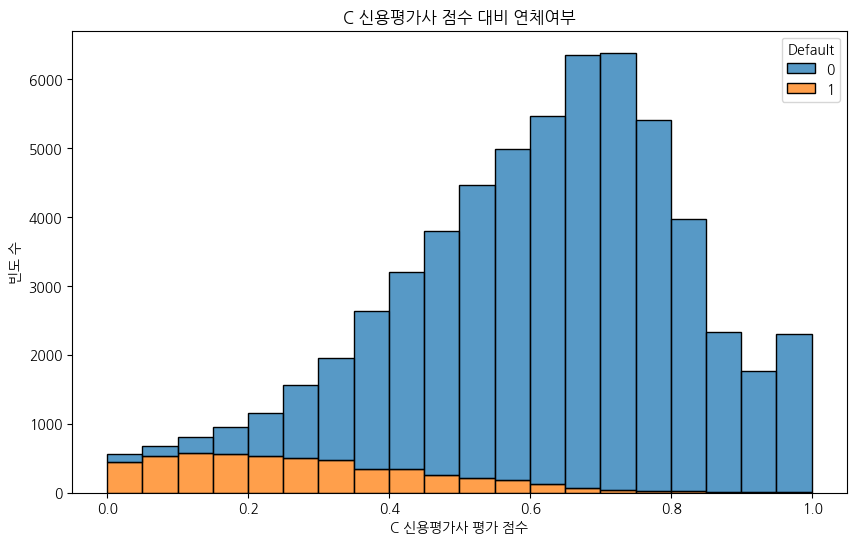

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_c, x='ScoreC', hue='Default', multiple='stack', bins=20)
plt.title('C 신용평가사 점수 대비 연체여부')
plt.xlabel('C 신용평가사 평가 점수')
plt.ylabel('빈도 수')
plt.show()

## ScoreABC

In [ ]:
# 조건을 검사할 함수 정의
def EmployedYearsch(row):
    if row['EmployedYears'] <= 3:
      return '3년이하'
    elif row['EmployedYears'] <= 7:
      return '7년이하'
    elif row['EmployedYears'] >= 8:
      return '8년 이상'

# apply 함수를 사용하여 조건을 적용
df_all['EmployedYears'] = df_all.apply(EmployedYearsch, axis=1)

In [ ]:
df_all['EmployedYears'].value_counts()

3년이하     24845
7년이하     21412
8년 이상    18829
Name: EmployedYears, dtype: int64

In [ ]:
df_all['AgeGroup'] = pd.cut(df_all['Age'], bins=range(0, 101, 10), right=False, labels=[f'{i}' for i in range(0, 100, 10)])
df_all['IdChangedYears'] = pd.cut(df_all['IdChangedYears'], bins=range(0, 17, 4), right=False, labels=[f'{i}' for i in range(0, 15, 4)])
df_all['InstallAmount'] = pd.cut(df_all['InstallAmount'], bins=range(0, 5500000, 500000), right=False, labels=[f'{i}' for i in range(0, 5000000, 500000)])

In [ ]:
df_all['Age'] = df_all['Age'].astype('int')
df_all['IdChangedYears'] = df_all['IdChangedYears'].astype('int')
df_all['InfoChangedYears'] = df_all['InfoChangedYears'].astype('int')
df_all['PhoneChangedYears'] = df_all['PhoneChangedYears'].astype('int')
df_all['AgeGroup'] =df_all['AgeGroup'].astype('int')
df_all['InstallAmount'] = df_all['InstallAmount'].astype('int')

In [ ]:
li_w = [[0.157167530224525], [0.14853195164076], [0.119170984455959], [0.105354058721934], [0.100172711571675], [0.081174438687392], [0.077720207253886], [0.075993091537133], [0.072538860103627], [0.062176165803109]]

In [ ]:
df_all = df_all.dropna(subset=['ScoreC','ScoreA', 'ScoreB'])
# df_all = df_all.drop('Default', axis=1)

In [ ]:
df_all.dropna(inplace=True)

/tmp/ipykernel_8345/2735049475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.dropna(inplace=True)


In [ ]:
df_all = pd.get_dummies(df_all)

In [ ]:
df_all['Aver'] = df_all[['ScoreA','ScoreB','ScoreC']].mean(axis=1)

In [ ]:
df_all['Aver'].value_counts()

0.694000    36
0.693333    34
0.654333    34
0.607667    34
0.737667    33
            ..
0.624000     1
0.457667     1
0.066000     1
0.307667     1
0.925000     1
Name: Aver, Length: 4090, dtype: int64

## Score_Mirae 생성

In [ ]:
df_all['AgeGroup'].value_counts()

30    10531
40     7725
20     5670
50     3163
60      323
Name: AgeGroup, dtype: int64

In [ ]:
df_all

,Age,FamilyCount,ChildCount,Default,ApplHour,CarPrice,Deposit,LoanTerm,LoanRemainTerm,InterestRate,...,Accompany_단독,Accompany_동행자 있음,InterestType_고정,InterestType_변동,InterestType_혼합,HomeAddMatchedYN_N,HomeAddMatchedYN_Y,WorkAddMatchedYN_N,WorkAddMatchedYN_Y,Aver
0,21,2,0,0,10,18000000,10,24,5,6.10,...,1,0,0,1,0,1,0,0,1,0.579667
1,21,0,0,0,13,52000000,30,48,13,6.83,...,1,0,0,1,0,0,1,0,1,0.396000
2,21,0,0,0,13,25000000,20,36,10,4.54,...,1,0,0,0,1,1,0,0,1,0.594000
6,21,4,2,0,14,43000000,10,24,3,4.30,...,1,0,0,1,0,0,1,0,1,0.158333
9,21,2,0,0,15,25000000,20,36,28,5.49,...,1,0,1,0,0,0,1,0,1,0.655667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94040,61,3,2,0,14,43000000,20,48,33,2.13,...,0,1,0,1,0,0,1,0,1,0.779667
94041,61,5,3,0,13,30000000,30,36,1,4.39,...,1,0,0,1,0,0,1,0,1,0.815000
94096,63,4,2,0,9,43000000,10,24,6,4.30,...,1,0,0,1,0,0,1,0,1,0.672000
94104,63,4,3,0,19,30000000,20,12,10,2.00,...,1,0,0,1,0,0,1,0,1,0.874333


In [ ]:
df_all['AgeGroup'] = df_all['AgeGroup'].replace({30: 0.3,20: 0.25,40: 0.2,60: 0.15,50: 0.1})
df_all['PhoneChangedYears'] = df_all['PhoneChangedYears'].replace({1: 0.2, 0: 0.15, 2: 0.13, 4: 0.12, 5: 0.11, 3: 0.09, 6: 0.08, 7: 0.07, 8: 0.05})
df_all['IdChangedYears'] = df_all['IdChangedYears'].replace({4: 0.4, 0: 0.3, 12: 0.2, 8: 0.1})
df_all['ResidenceClass_최상'] = df_all['ResidenceClass_최상'].replace({1: 0.048})
df_all['Gender_남성'] = df_all['Gender_남성'].replace({1:0.032})
df_all['Education_대학교'] = df_all['Education_대학교'].replace({1:0.054})

* value weight by Decesion Tree Model

In [ ]:
df_value_w = df_all[['PhoneChangedYears','Education_대학교', 'EmployedYears_8년 이상', 'ResidenceClass_평균', 'IdChangedYears', 'InquiryCount', 'EmployedYears_3년이하','AgeGroup','ResidenceClass_최상','InterestType_고정']]
df_y = df_all['Aver']

In [ ]:
df_value_w = np.array(df_value_w)
df_x_w = np.array(li_w)

In [ ]:
df_mirae = df_value_w.dot(df_x_w)

In [ ]:
df_ScoreM = pd.DataFrame(df_mirae)
df_ScoreM.rename(columns={0: 'Score_Mirae'}, inplace=True)

In [ ]:
df_ScoreM['Score_Mirae'] = 1 - df_ScoreM['Score_Mirae']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m = ['Score_Mirae']
scaler = MinMaxScaler(feature_range=(0, 0.9))
df_ScoreM = scaler.fit_transform(df_ScoreM)
df_ScoreM = pd.DataFrame(df_ScoreM, columns=m)

display("Min-Max Scale 변환 후:", df_ScoreM)

'Min-Max Scale 변환 후:'

,Score_Mirae
0,0.786534
1,0.782041
2,0.823109
3,0.645722
4,0.831816
...,...
27407,0.835429
27408,0.813419
27409,0.825507
27410,0.867741


array([[<Axes: title={'center': 'Score_Mirae'}>]], dtype=object)

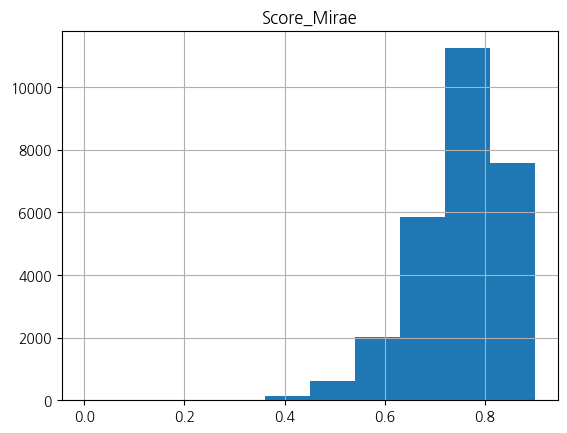

In [ ]:
df_ScoreM.hist()

In [ ]:
df_y = pd.DataFrame(list(df_y))

In [ ]:
df_test = pd.concat([df_ScoreM,df_y], axis =1 , ignore_index= True)

In [ ]:
df_test.rename(columns={0: 'Score_Mirae'}, inplace=True)
df_test.rename(columns={1: 'Score_ABC'}, inplace=True)

In [ ]:
df_test = df_test.astype('float')

In [ ]:
df_test['Score_Mirae'].corr(df_test['Score_ABC'])

0.058080843665040065

In [ ]:
import matplotlib.pyplot as plt # 다운 받은 글꼴 plt에 적용
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '빈도')

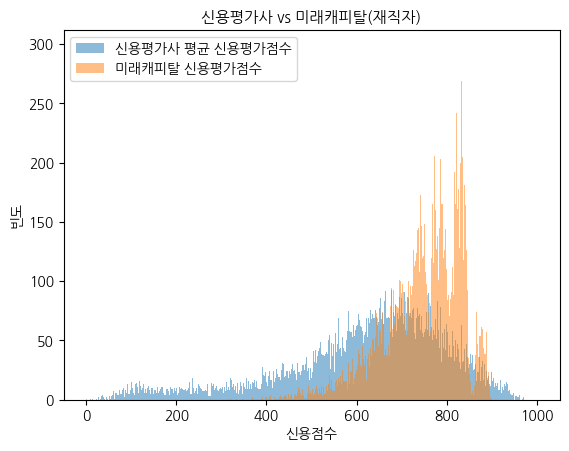

In [ ]:
# plt.subplot(1,2,2)

plt.hist(df_test['Score_ABC']*1000, label = '신용평가사 평균 신용평가점수', alpha = 0.5, bins=range(0, 1001, 1))
plt.hist(df_test['Score_Mirae'] *1000, label = '미래캐피탈 신용평가점수', alpha = 0.5, bins=range(0, 1001, 1))
plt.legend()
plt.title('신용평가사 vs 미래캐피탈(재직자)',fontsize=11)

plt.xlabel('신용점수')
plt.ylabel('빈도')

# 검증

In [ ]:
df_test

,Score_Mirae,Score_ABC
0,0.786534,0.579667
1,0.782041,0.396000
2,0.823109,0.594000
3,0.645722,0.158333
4,0.831816,0.655667
...,...,...
27407,0.835429,0.779667
27408,0.813419,0.815000
27409,0.825507,0.672000
27410,0.867741,0.874333


In [ ]:
df_x = df_test[['Score_Mirae']] # or Score_ABC
df_y = df_all['Default']

In [ ]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: random seed)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (19188, 1)
train data Y size : (19188,)
test data X size : (8224, 1)
test data Y size : (8224,)


In [ ]:
tree_uncust = DecisionTreeClassifier()
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.937
Accuracy on test set: 0.908


In [ ]:
# 평가
y_pred = tree_uncust.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_uncust.score(df_test_x, df_test_y)))
print("미래캐피탈 신용점수 예측모델 평가: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy: 0.908

미래캐피탈 신용점수 예측모델 평가: 
[[7436  154]
 [ 606   28]]
              precision    recall  f1-score   support

           0      0.925     0.980     0.951      7590
           1      0.154     0.044     0.069       634

    accuracy                          0.908      8224
   macro avg      0.539     0.512     0.510      8224
weighted avg      0.865     0.908     0.883      8224



* accuracy: 0.908, F1-Score: 0.06

## 결론

- 재직자, 퇴직자 데이터에 대한 신용평가 모델 구축해 보았음.
- 모델에서 도출된 핵심인자 뿐 아니라 차후 데이터셋에 없는 비금융적 요소 추가할 필요 있음.
- 초기 단계이기 때문에 타 신용평가사와 병행해서 사용 하고 데이터를 확보할때마다 모델 학습을 진행해야 함.
- 이번 프로젝트에서는 직접 가중치를 부여하였는데 차후 리팩토링 과정에서 WOE 기법을 활용해봐도 좋을 듯.